In [1]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn import metrics

Using TensorFlow backend.


In [2]:
from mobilenetv2 import MobileNetV2_DANN

In [3]:
path = '/Users/irashokar/documents/NOvA_2/files/Feb_test_ii/genie_on_both/'
with open(path + 'history_32_Adam_genie_200.pkl','rb') as f1:
    history = pkl.load(f1)

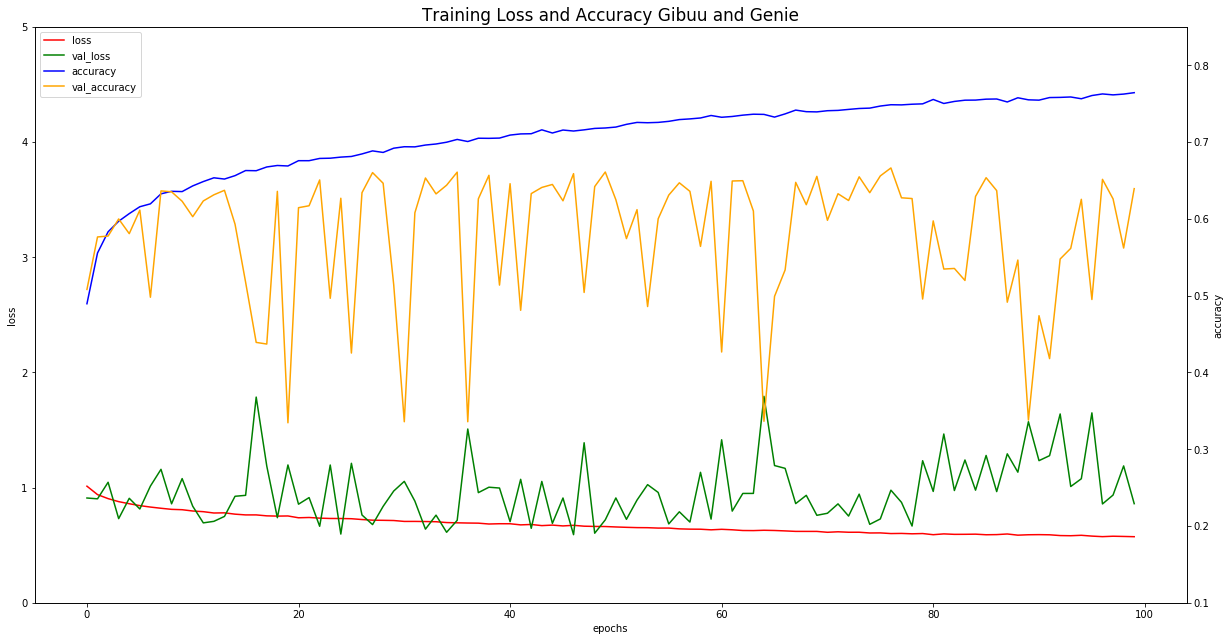

In [4]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx() 


lns1 = ax1.plot(history.history['loss'][:100], color='red', label='loss')
lns2 = ax1.plot(history.history['val_loss'][:100], color='green', label='val_loss')

lns3 = ax2.plot(history.history['accuracy'][:100], color='blue', label='accuracy')
lns4 = ax2.plot(history.history['val_accuracy'][:100], color='orange', label='val_accuracy')


leg = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc='upper left')
plt.title('', fontsize=20)

plt.rcParams.update({'font.size': 14})

ax1.set_ylim(0.0, 5)
ax1.set_ylabel('loss')

ax2.set_ylim(0.1, 0.85)
ax2.set_ylabel('accuracy')

ax1.set_xlabel('epochs')
ax1.set_title('Training Loss and Accuracy Gibuu and Genie')

plt.show()


In [5]:
with open(path+ 'test_probabilities_genie_on_both__32_Adam_genie_200.pkl','rb') as f2:
    probabilities = pkl.load(f2)
with open(path+ 'test_df_genie_on_both__32_Adam_genie_200.pkl','rb') as f6:
    df = pkl.load(f6)
with open(path+ 'df_physics_genie_on_both__32_Adam_genie_200.pkl','rb') as f6:
    physics = pkl.load(f6)
with open(path + 'nodes_values_genie_on_both__32_Adam_genie_200.pkl', 'rb') as f7:
    node_values = f7


In [6]:
labels = list(df['label'])
gibuu_weights = list(df['weight'])

events = np.zeros((len(df['file']), 2))
for i in range(len(df['file'])):
    if '_genie_' in str(df['file']):
        events[i] = [1, 0]
    elif 'gibuu' in str(df['file']):
        events[i] = [0, 1]

In [7]:
predictions = []
for i in probabilities:
    nc = i[0][0]
    nu_e = i[0][1]
    nu_mu = i[0][2]
    if nc>= nu_e and nc>=nu_mu:
        predictions.append(0)
    elif nu_e>= nc and nu_e>=nu_mu:
        predictions.append(1)
    elif nu_mu>= nu_e and nu_mu>=nc:
        predictions.append(2)
    
def sub(x):
    return x-1

test_vals = list(map(sub, labels))
    

#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.6210216332540491 

[[0.05372573 0.6243682  0.32190606]] 

[[0.8391849  0.04022669 0.12058837]] 

[[0.20050149 0.47701964 0.3224788 ]] 

[[0.74327344 0.03724977 0.21947677]] 

[[0.03720215 0.00913669 0.9536612 ]] 

[[0.92036015 0.00741936 0.0722204 ]] 

[[0.75821245 0.13019703 0.11159047]] 

[[0.9079674  0.02712234 0.06491036]] 

[[0.2581903  0.7241957  0.01761404]] 

[[0.00221061 0.00261259 0.9951768 ]] 

Predictions: 

[1, 0, 1, 0, 2, 0, 0, 0, 1, 2] 

Truth labels: 

[2, 0, 0, 1, 0, 0, 2, 1, 1, 2]


Text(0, 0.5, 'Count')

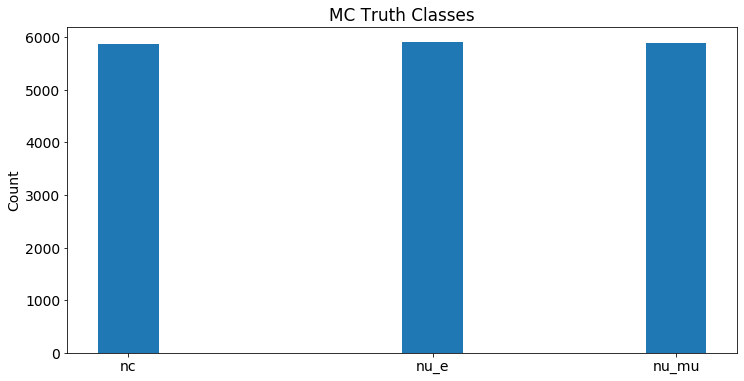

In [8]:
plt.figure(figsize=(12,6))
plt.hist(test_vals)
x = [0.1, 1.1, 1.9]
class_names = ['nc', 'nu_e', 'nu_mu']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

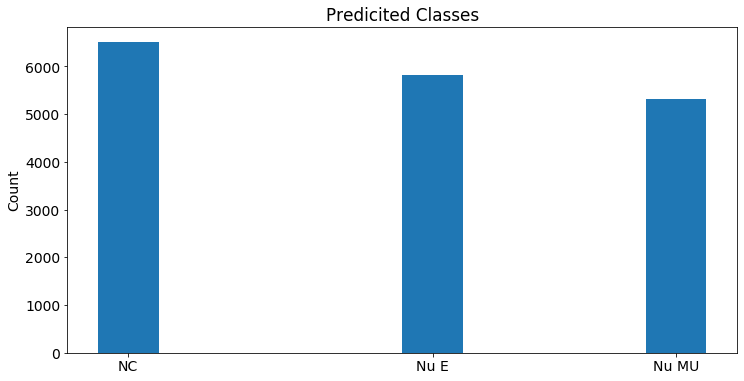

In [9]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

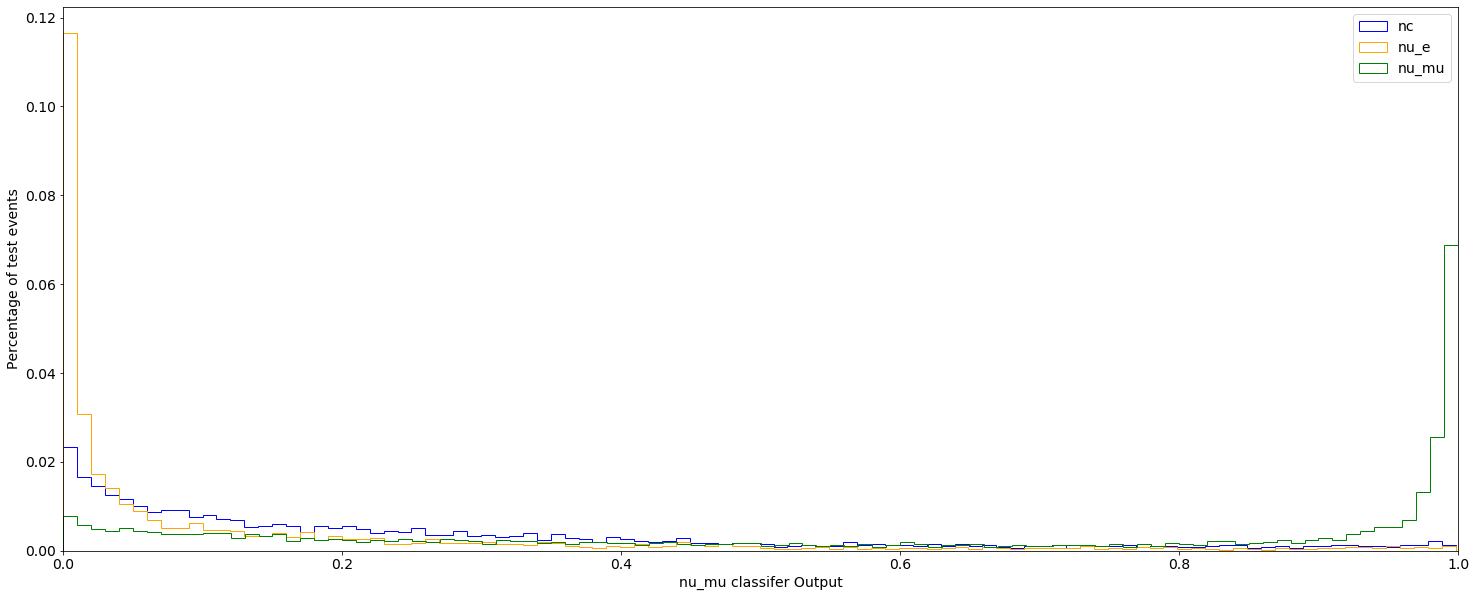

In [29]:
def classifier_output(probabilities, interaction):      

    if interaction == 'nc':
        index = 0
    elif interaction == 'nu_e':
        index = 1
    elif interaction == 'nu_mu':
        index = 2
        
    mu_e = []
    nc = []
    nu_mu = []
    
    for i in range(len(probabilities)):
        if test_vals[i] ==0 :
            nc.append(probabilities[i][0][index])
        elif test_vals[i] ==1:
            mu_e.append(probabilities[i][0][index])
        elif test_vals[i] ==2:
            nu_mu.append(probabilities[i][0][index])

    plt.figure(figsize=(25,10))
    factor = 1/(len(test_vals))
    
    (counts, bins) = np.histogram(nc, bins=100)
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, linestyle=('solid'),color=('b'))
    
    (counts, bins) = np.histogram(mu_e, bins=100)
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, linestyle=('solid'),color=('orange'))


    (counts, bins) = np.histogram(nu_mu, bins=100)
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, linestyle=('solid'),color=('g'))

    plt.legend(['nc', 'nu_e','nu_mu'], loc='best')
    plt.ylabel('Percentage of test events')
    plt.xlim(0,1)
    plt.xlabel('{} classifer Output'.format(interaction))
    
classifier_output(probabilities, 'nu_mu')

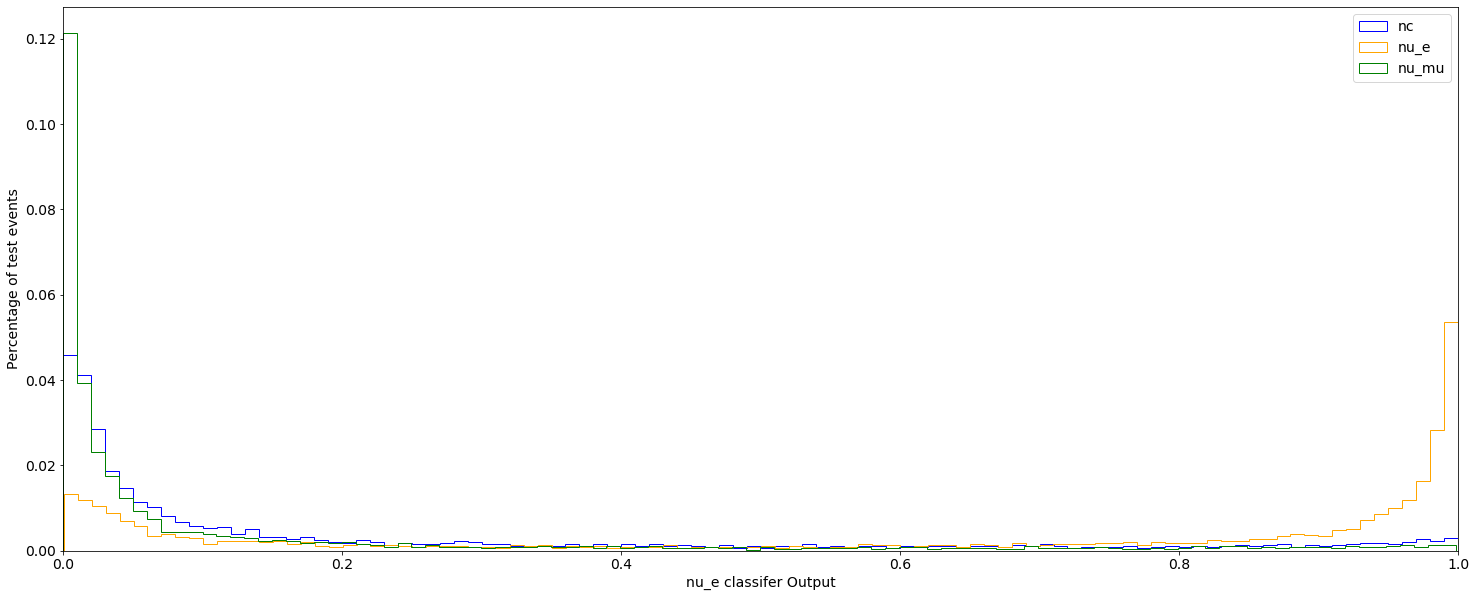

In [30]:
classifier_output(probabilities, 'nu_e')

In [35]:
def purity_efficiency(probabilites, interaction):
    
    if interaction == 'nc':
        index = 0
    elif interaction == 'nu_e':
        index = 1
    elif interaction == 'nu_mu':
        index = 2
    
    purity_list = []
    efficiency_list = []
    p_x_e_list = []
    
    gibuu_weights=[int(1) for i in range(len(probabilities))]

    for j in np.arange(0, 0.99, 0.01):
        nu_mu_above = []
        nu_mu_below = []
        nc_above = []
        nc_below = []
        nu_e_above = []
        nu_e_below = []
        

        for i in range(len(probabilities)):
            if test_vals[i] ==2:
                if probabilities[i][0][index]>=j:
                    nu_mu_above.append(probabilities[i][0][index]*gibuu_weights[i])
                elif probabilities[i][0][index]<=j:
                    nu_mu_below.append(probabilities[i][0][index]*gibuu_weights[i])

            elif test_vals[i] ==0:         
                if probabilities[i][0][index]>=j:
                    nc_above.append(probabilities[i][0][index]*gibuu_weights[i])
                elif probabilities[i][0][index]<=j:
                    nc_below.append(probabilities[i][0][index]*gibuu_weights[i])

            elif test_vals[i] ==1:        
                if probabilities[i][0][index]>=j:
                    nu_e_above.append(probabilities[i][0][index]*gibuu_weights[i])
                elif probabilities[i][0][index]<=j:
                    nu_e_below.append(probabilities[i][0][index]*gibuu_weights[i])
        
        if interaction == 'nc':
            purity = len(nc_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
            efficiency = len(nc_above)/(len(nc_above)+len(nc_below))
            
        elif interaction == 'nu_e':
            purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
            efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
            
        elif interaction == 'nu_mu':      
            purity = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
            efficiency = len(nu_mu_above)/(len(nu_mu_above)+len(nu_mu_below))
            
        purity_list.append(purity*100)
        efficiency_list.append(efficiency*100)
        p_x_e_list.append(purity*efficiency*100)
    
    plt.figure(figsize=(25,10))
    plt.plot(purity_list)
    plt.plot(efficiency_list)
    plt.plot(p_x_e_list)
    #plt.xlabel('{} classifer Output Percentage'.format(interaction))
    plt.xlabel('{} classifer Output Percentage'.format('nu_mu'))
    plt.ylabel('Percentage')
    plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='right')

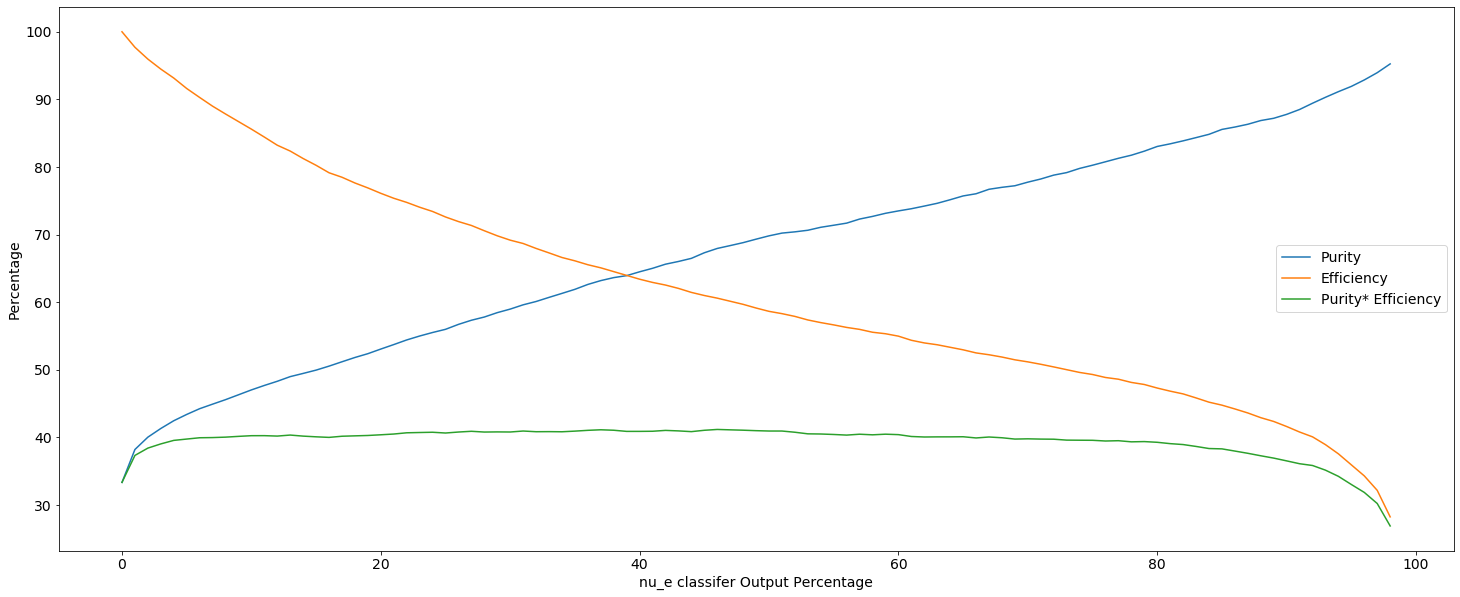

In [34]:
purity_efficiency(probabilities, 'nu_mu')

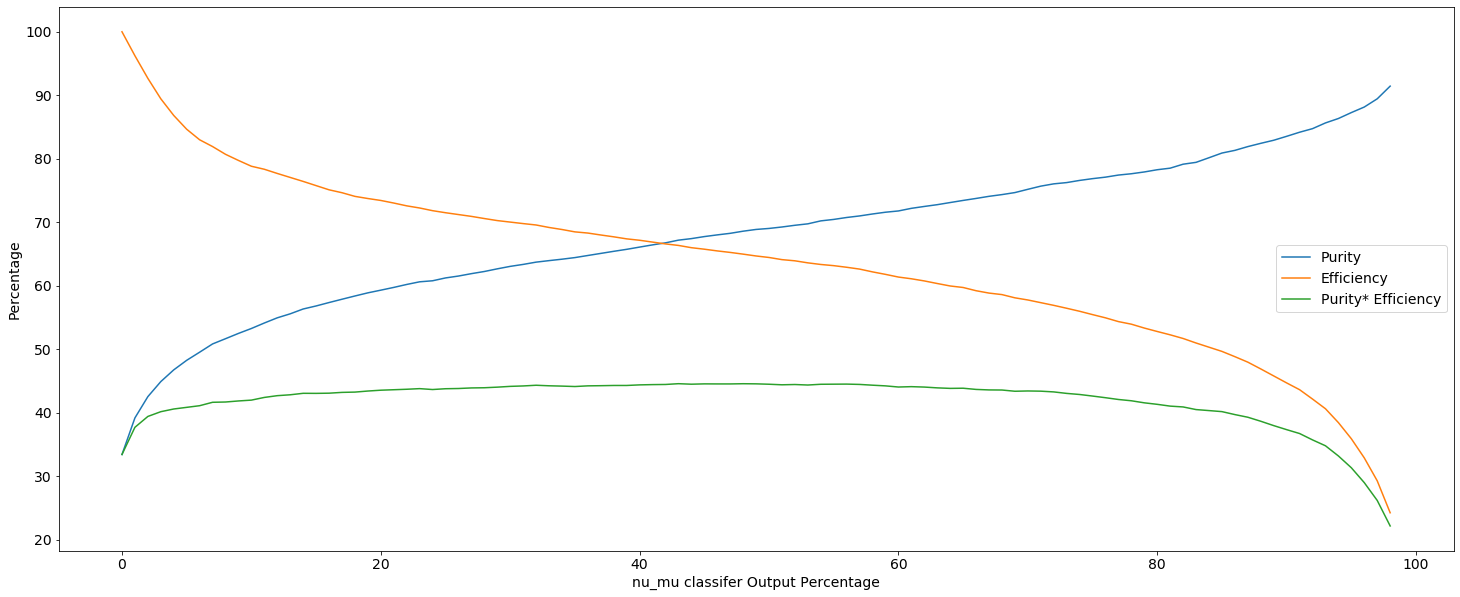

In [36]:
purity_efficiency(probabilities, 'nu_e')

In [ ]:
purity_list = []
efficiency_list = []
p_x_e_list = []
 
for j in np.arange(0, 0.99, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i][0][1]>=j:
                nu_mu_above.append(probabilities[i][0][1]*gibuu_weights[i])
            elif probabilities[i][0][1]<=j:
                nu_mu_below.append(probabilities[i][0][1]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i][0][1]>=j:
                nc_above.append(probabilities[i][0][1]*gibuu_weights[i])
            elif probabilities[i][0][1]<=j:
                nc_below.append(probabilities[i][0][1]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i][0][1]>=j:
                nu_e_above.append(probabilities[i][0][1]*gibuu_weights[i])
            elif probabilities[i][0][1]<=j:
                nu_e_below.append(probabilities[i][0][1]*gibuu_weights[i])
                
        
                
    purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu E classifer Output')
plt.ylabel('Percentage')
plt.title('SGD - Gibuu and genie ')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [ ]:
def node_event(node):
    nc_genie = []
    nc_gibuu = []
    nu_e_genie = []
    nu_e_gibuu = []
    nu_mu_genie = []
    nu_mu_gibuu = []
    for i in range(len(events)):
        if test_vals[i] == 0 and events[i][0] == 1:
            nc_genie.append(node_values[i][0][node])
        elif test_vals[i] == 0 and events[i][1]  == 1:
            nc_gibuu.append(node_values[i][0][node])
        elif test_vals[i] == 1 and events[i][0]  == 1:
            nu_e_genie.append(node_values[i][0][node])
        elif test_vals[i] == 1 and events[i][1]  == 1:
            nu_e_gibuu.append(node_values[i][0][node])
        elif test_vals[i] == 2 and events[i][0]  == 1:
            nu_mu_genie.append(node_values[i][0][node])
        elif test_vals[i] == 2 and events[i][1]  == 1:
            nu_mu_gibuu.append(node_values[i][0][node])
    plt.figure(figsize=(16,10))
    g = sns.distplot(nc_genie, bins = 50, kde = False, hist_kws={"histtype": "step", "linewidth": 3, 'linestyle':'--'}, color="g")
    g = sns.distplot(nu_e_genie, bins = 50, kde = False, hist_kws={"histtype": "step", "linewidth": 3, 'linestyle':'--'}, color="b")
    g = sns.distplot(nu_mu_genie, bins = 50, kde = False, hist_kws={"histtype": "step", "linewidth": 3, 'linestyle':'--'}, color="r")
    g = sns.distplot(nc_gibuu, bins = 50, kde = False, hist_kws={"histtype": "step", "linewidth": 3}, color="g")
    g = sns.distplot(nu_e_gibuu, bins = 50, kde = False, hist_kws={"histtype": "step", "linewidth": 3}, color="b")
    g = sns.distplot(nu_mu_gibuu, bins = 50, kde = False, hist_kws={"histtype": "step", "linewidth": 3}, color="r")
    plt.legend(['nc_genie', 'nu_e_genie', 'nu_mu_genie', 'nc_gibuu', 'nu_e_gibuu', 'nu_mu_gibuu'], loc='upper right')
    plt.xlabel('Node Value')
    plt.ylabel('Counts')
    plt.title('Node Number {}'.format(node))
    g.set(ylim=(0,250))
    plt.xlim(0,1)

In [ ]:
pr_nc = []
pr_nu_e = []
pr_nu_mu = []
for i in range(len(probabilities)):
    pr_nc.append(probabilities[i][0][0])
    pr_nu_e.append(probabilities[i][0][1])
    pr_nu_mu.append(probabilities[i][0][2])

nc_fpr, nc_tpr, nc_thresholds = metrics.roc_curve(test_vals, pr_nc, pos_label=0)
nu_e_fpr, nu_e_tpr, nu_e_thresholds = metrics.roc_curve(test_vals, pr_nu_e, pos_label=1)
nu_mu_fpr, nu_mu_tpr, nu_mu_thresholds = metrics.roc_curve(test_vals, pr_nu_mu, pos_label=2)

plt.figure(figsize=(10,10))
plt.plot(nc_fpr, nc_tpr, label = 'NC')
plt.plot(nu_e_fpr, nu_e_tpr, label = 'Nu E')
plt.plot(nu_mu_fpr, nu_mu_tpr, label = 'Nu Mu')
plt.legend(['NC', 'Nu E', 'Nu Mu',], loc='upper left')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.plot([0,1], [0,1], '--')

In [ ]:
def node_event(node):
    bins = 20
    nc_genie = []
    nc_gibuu = []
    nu_e_genie = []
    nu_e_gibuu = []
    nu_mu_genie = []
    nu_mu_gibuu = []
    for i in range(len(events)):
        if test_vals[i] == 0 and events[i][0] == 1:
            nc_genie.append(node_values[i][0][node])
        elif test_vals[i] == 0 and events[i][1]  == 1:
            nc_gibuu.append(node_values[i][0][node])
        elif test_vals[i] == 1 and events[i][0]  == 1:
            nu_e_genie.append(node_values[i][0][node])
        elif test_vals[i] == 1 and events[i][1]  == 1:
            nu_e_gibuu.append(node_values[i][0][node])
        elif test_vals[i] == 2 and events[i][0]  == 1:
            nu_mu_genie.append(node_values[i][0][node])
        elif test_vals[i] == 2 and events[i][1]  == 1:
            nu_mu_gibuu.append(node_values[i][0][node])

    dataset_ = [nc_genie, nc_gibuu, nu_e_genie, nu_e_gibuu, nu_mu_genie, nu_mu_gibuu]
    label = ['nc_genie', 'nc_gibuu', 'nu_e_genie', 'nu_e_gibuu', 'nu_mu_genie', 'nu_mu_gibuu']

    plt.figure(figsize=(8,5))
    (counts, bins) = np.histogram(nc_genie, bins=bins)
    factor = 1/(len(nc_genie))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nc_genie', linestyle=('solid'),color=('g'))
    
    (counts, bins) = np.histogram(nc_gibuu, bins=bins)
    factor = 1/(len(nc_gibuu))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nc_gibuu', linestyle=('dashed'),color=('g'))
    
    (counts, bins) = np.histogram(nu_e_genie, bins=bins)
    factor = 1/(len(nu_e_genie))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_e_genie', linestyle=('solid'),color=('r'))
    
    (counts, bins) = np.histogram(nu_e_gibuu, bins=bins)
    factor = 1/(len(nu_e_gibuu))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_e_gibuu', linestyle=('dashed'),color=('r'))
    
    (counts, bins) = np.histogram(nu_mu_genie, bins=bins)
    factor = 1/(len(nu_mu_genie))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_mu_genie', linestyle=('solid'),color=('b'))
    
    (counts, bins) = np.histogram(nu_mu_gibuu, bins=bins)
    factor = 1/(len(nu_mu_gibuu))
    plt.hist(bins[:-1], bins, weights=factor*counts, histtype='step', fill=False, label='nu_mu_gibuu', linestyle=('dashed'),color=('b'))

    plt.title('Node Number {}'.format(node))
    plt.legend(prop={'size': 10})
    plt.xlabel('Node Value')
    plt.ylabel('Percentage of Data')
    plt.xlim(0.05,1)
    plt.ylim(0,0.2)
    plt.show()

In [ ]:
def node_pe(node):
    for j in np.arange(0, 0.25, 0.01):
        purity_list = []
        efficiency_list = []
        p_x_e_list = []
        
        nu_mu_above = []
        nu_mu_below = []
        nc_above = []
        nc_below = []
        nu_e_above = []
        nu_e_below = []
        for i in range(len(probabilities)):
            if test_vals[i] ==2:
                if probabilities[i][0][1]>=j:
                    nu_mu_above.append(node_values[i][0][node])
                elif probabilities[i][0][1]<=j:
                    nu_mu_below.append(node_values[i][0][node])

            elif test_vals[i] ==0:         
                if probabilities[i][0][1]>=j:
                    nc_above.append(node_values[i][0][node])
                elif probabilities[i][0][1]<=j:
                    nc_below.append(node_values[i][0][node])

            elif test_vals[i] ==1:        
                if probabilities[i][0][1]>=j:
                    nu_e_above.append(node_values[i][0][node])
                elif probabilities[i][0][1]<=j:
                    nu_e_below.append(node_values[i][0][node])
                    
                    
    purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)

    fig = plt.figure(figsize=(20,10))
    plt.plot(purity_list)
    plt.plot(efficiency_list)
    plt.plot(p_x_e_list)
    plt.xlabel('Nu Mu classifer Output')
    plt.ylabel('Percentage')
    plt.title('Trained and Tested on Both Datasets')
    plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')